In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
text_data = pd.read_csv('Corona_NLP_train2.csv')

In [3]:
text_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


## step one unique 

In [5]:
text_data['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [6]:
text_data['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [7]:
text_data['Sentiment'].value_counts().idxmax()

'Positive'

### subset data frame
### filter 
### groupby or pivot table
### step 2 

In [8]:
Sentiments = text_data["Sentiment"]
Sentiments.head()

0               Neutral
1              Positive
2              Positive
3              Positive
4    Extremely Negative
Name: Sentiment, dtype: object

In [9]:
Sentiments_date = text_data[["Sentiment","TweetAt"]]
Sentiments_date.head()

,Sentiment,TweetAt
0,Neutral,16/03/2020
1,Positive,16/03/2020
2,Positive,16/03/2020
3,Positive,16/03/2020
4,Extremely Negative,16/03/2020


In [10]:
Sentiments_postive = Sentiments_date [Sentiments_date ["Sentiment"] == "Extremely Positive"]
Sentiments_postive.head()

,Sentiment,TweetAt
11,Extremely Positive,16/03/2020
12,Extremely Positive,16/03/2020
18,Extremely Positive,16/03/2020
22,Extremely Positive,16/03/2020
23,Extremely Positive,16/03/2020


In [11]:
group = Sentiments_postive.groupby('TweetAt')['Sentiment'].count()

group.sort_values(ascending=False).head()

TweetAt
25/03/2020    545
19/03/2020    482
20/03/2020    478
21/03/2020    426
18/03/2020    408
Name: Sentiment, dtype: int64

In [12]:
# flights_by_carrier = Sentiments_postive.pivot_table(index='TweetAt', columns='Sentiment', aggfunc='count')
# flights_by_carrier.head()

In [13]:
# flight_delays_by_day = Sentiments_postive.pivot_table(index='TweetAt', values='Sentiment', aggfunc='count')
# flight_delays_by_day

## step 3  convert the messages to lower case, replace non-alphabetical characters with whitespaces and ensure that the words of a message are separated by a single whitespace

In [14]:
# df.apply(lambda x: x.astype(str).str.upper())

In [15]:
# messages = text_data["OriginalTweet"].str.lower()
# messages.head()

In [16]:
text_data['OriginalTweet'].loc[0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [17]:
text_data_new = text_data.copy()
text_data_new.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [18]:
# text_data_new['OriginalTweet'] = text_data_new['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

In [19]:
text_data_new['OriginalTweet'].loc[0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

### here we have converted to lower case and removed noise such as non-alphabetical characters with whitespaces and ensure that the words of a message are separated by a single whitespac

In [20]:

text_data_new['OriginalTweet'] = text_data_new['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)
text_data_new['OriginalTweet'] = text_data_new['OriginalTweet'].str.replace('[^0-9a-zA-Z]+', ' ', case=False)
text_data_new['OriginalTweet'] = text_data_new["OriginalTweet"].str.lower()

In [21]:
text_data_new['OriginalTweet'].loc[0]

' menyrbie phil gahan chrisitv and and '

In [22]:
# text_data_new['OriginalTweet'] = text_data_new['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

In [23]:
# text_data_new['OriginalTweet'].loc[0]

In [24]:
# df['Email'].apply(lambda x: re.findall(p, x))

In [25]:
# text_data = text_data_new['OriginalTweet'].apply(lambda x: re.sub('[^0-9a-zA-Z]+'," ",x))
# # txt_new = txt_new.apply(lambda x: re.sub(' +', ' ', x))
# text_data = text_data_new[['OriginalTweet'].apply(lambda x: re.sub('[^https?:\/\/\S]+'," ",x))


In [26]:
# create a function to clean the text

In [27]:
# import re
# import string

# def clean_text_round1(text):
#     '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
#     text = text.lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\w*\d\w*', '', text)
    
#     return text

# txt_new['OriginalTweet']=txt_new['OriginalTweet'].apply(clean_text_round1)


# txt_new_txt



In [28]:
## Tokenize the tweets

### Tokenize the tweets (i.e. convert each into a list of words), count the total number
### of all words (including repetitions), the number of all distinct words and the 10 most frequent words in the #### corpus

In [29]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

In [30]:
tweet_tokens = []
for sent in text_data_new:
    print(tweet_tokenizer.tokenize(sent))
    tweet_tokens.append(tweet_tokenizer.tokenize(sent))

['UserName']
['ScreenName']
['Location']
['TweetAt']
['OriginalTweet']
['Sentiment']


In [31]:
text_data_new

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16/03/2020,menyrbie phil gahan chrisitv and and,Neutral
1,3800,48752,UK,16/03/2020,advice talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16/03/2020,coronavirus australia woolworths to give elder...,Positive
3,3802,48754,NaN,16/03/2020,my food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16/03/2020,me ready to go at supermarket during the covid...,Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14/04/2020,airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14/04/2020,response to complaint not provided citing covi...,Extremely Negative
41154,44953,89905,NaN,14/04/2020,you know it s getting tough when kameronwilds ...,Positive
41155,44954,89906,NaN,14/04/2020,is it wrong that the smell of hand sanitizer i...,Neutral


In [32]:
text_data_new['OriginalTweet']

0                    menyrbie phil gahan chrisitv and and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know it s getting tough when kameronwilds ...
41155    is it wrong that the smell of hand sanitizer i...
41156     tartiicat well new used rift s are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

df_list = text_data_new['OriginalTweet'].values.tolist()
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df_list)
X_train_counts

<41157x54853 sparse matrix of type '<class 'numpy.int64'>'
	with 1088344 stored elements in Compressed Sparse Row format>

In [34]:
print('Total unique words : ',len(count_vect.get_feature_names()))

Total unique words :  54853


In [35]:
token_count_df = pd.DataFrame(X_train_counts.toarray(),columns = count_vect.get_feature_names())

In [36]:
print('Total word with repitions : ',token_count_df.sum().sum())

Total word with repitions :  1204088


In [37]:
vocabulary_sort_alldocs  = token_count_df.sum().sort_values(ascending= False)

In [38]:
vocabulary_sort_alldocs.head(10)

the            44913
to             38489
and            24105
of             21555
in             19334
coronavirus    18196
19             15892
covid          15535
for            14061
is             12267
dtype: int64

In [39]:
count_vect_sw = CountVectorizer(stop_words='english', min_df=2)
X_train_counts_sw = count_vect_sw.fit_transform(df_list)
print('Total unique words : ',len(count_vect_sw.get_feature_names()))

Total unique words :  22263


In [40]:
X_train_counts_sw

<41157x22263 sparse matrix of type '<class 'numpy.int64'>'
	with 652321 stored elements in Compressed Sparse Row format>

### Remove stop words, words with ≤ 2 characters and recalculate the number
### of all words (including repetitions) and the 10 most frequent words in the modified corpus

In [41]:
token_count_df_sw = pd.DataFrame(X_train_counts_sw.toarray(),columns = count_vect_sw.get_feature_names())

In [42]:
print('Total word with repitions : ',token_count_df_sw.sum().sum())

Total word with repitions :  682346


In [43]:
vocabulary_sort_alldocs_sw  = token_count_df_sw.sum().sort_values(ascending= False)

In [44]:
vocabulary_sort_alldocs_sw.head(10)

coronavirus    18196
19             15892
covid          15535
prices          7959
food            7179
supermarket     7096
store           6931
grocery         6284
people          5625
amp             5197
dtype: int64

#### Histogram

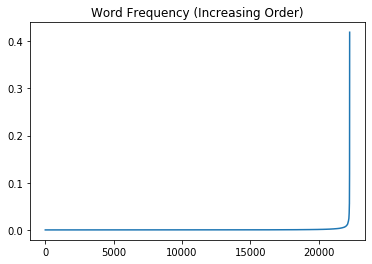

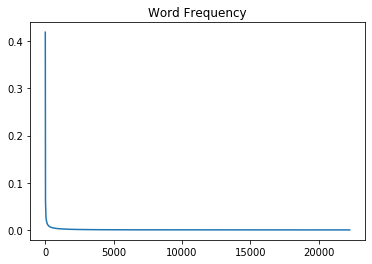

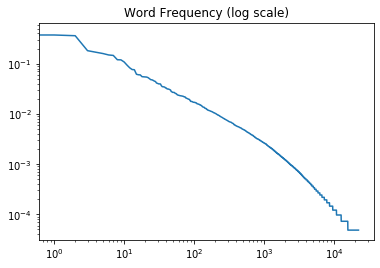

In [45]:
num_docs = token_count_df_sw.shape[0]
token_doc_occ_freq = (token_count_df_sw != 0).sum(0) / num_docs
token_doc_occ_freq = token_doc_occ_freq.sort_values(ascending= False)

# Convert words to numbers
token_doc_occ_freq_num = token_doc_occ_freq.reset_index(drop=True)

token_doc_occ_freq_num.sort_values(ascending= True).reset_index(drop=True) \
.plot(title = 'Word Frequency (Increasing Order)')
plt.figure()
token_doc_occ_freq_num.plot(title = 'Word Frequency')
plt.figure()
token_doc_occ_freq_num.plot(title = 'Word Frequency (log scale)',logx=True, logy = True)

In [46]:
vocabulary_sort_alldocs_sw.head(10)

coronavirus    18196
19             15892
covid          15535
prices          7959
food            7179
supermarket     7096
store           6931
grocery         6284
people          5625
amp             5197
dtype: int64

In [47]:
y = text_data_new['Sentiment']

In [48]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_counts_sw,y)
y_pred = model.predict(X_train_counts_sw)

In [49]:
from sklearn.metrics import classification_report
clf_report_dict = classification_report(y, y_pred, output_dict=True)
pd.DataFrame(clf_report_dict).round(2).T

,precision,recall,f1-score,support
Extremely Negative,0.77,0.73,0.75,5481.00
Extremely Positive,0.75,0.75,0.75,6624.00
Negative,0.68,0.70,0.69,9917.00
Neutral,0.78,0.69,0.73,7713.00
Positive,0.68,0.73,0.70,11422.00
accuracy,0.72,0.72,0.72,0.72
macro avg,0.73,0.72,0.72,41157.00
weighted avg,0.72,0.72,0.72,41157.00
